### !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

## 1.2 Important Dependencies

In [1]:
#import standard dependecies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import tensorflow dependencies - functional APIs
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.3 Set GPU Growth

In [3]:
# Avoid DOM errors by setting GPU Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth_(gpu, True)

## 1.4 Create Folder Structures

In [5]:
# Setup Paths 
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
# Make the directeries
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# 2 Collect Positives and Anchors

## 2.1 Untar Labelled Faces In the wild Dataset

In [7]:
# http://vis-www.cs.umass.edu/lfw/ 

In [8]:
# Uncompress Tar GZ labelled faces in the wild datase
!tar -xf lfw.tgz

In [9]:
# Move lfw Images to the following repo data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [10]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        print(os.path.join('lfw', directory, file))
        print(os.path.join(NEG_PATH, file))

## 2.2 Collect Positive and Anchor classes

## #importing opencv library
### from cv2 import *

## #code to collect image in different way
### cam_port = 0
### cam = cv2.VideoCapture(cam_port)

## # reading the input using webcam
### result, image = cam.read()

## # If image will detected without any error,
## ## show result
### if result:
    
##     # showing result, it take frame name and image
##     # output
###     cv2.imshow("test", image)
    
##     # saving image in local storage
###     cv2.imwrite(os.path.join(POS_PATH,"test.png"), image)
    
##     # if keyboard interrupt occurs, destroy image
##     # window
###     cv2.waitKey(0)
###     cv2.destroyWindow("test")
    
## ## if captured image is corrupted, moving to else part
### else:
###     print("No image detected. Please! try again")

In [11]:
# import uuid library to generrate unique image names
import uuid

In [15]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while (cap.isOpened()):
    ret, frame = cap.read()
    
#     # cut down frame to 250X250px
#     frame = frame[120:120+250, 200:200+250, :]
    
    # Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # storing frame in local storage
#     cv2.imwrite(os.path.join(POS_PATH,"test.png"), frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

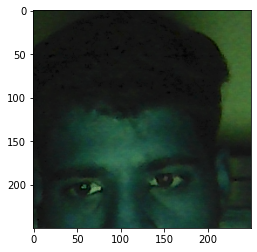

In [13]:
plt.imshow(frame[120:120+250, 200:200+250, :])

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [16]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*jpg').take(300)

In [17]:
dir_test = anchor.as_numpy_iterator()

In [19]:
print(dir_test.next())

b'data\\anchor\\e2f01db3-d21c-11ec-8967-b0a460509de8.jpg'


## 3.2 Preprocessing - Scale and Resize

In [20]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100,100))
    img = img / 255.0
    return img

## 3.3 Create Labelled Dataset

## 3.4 Build Train and Test partition

# 4. Model Engineering